<a href="https://colab.research.google.com/github/rbechara1309/python/blob/main/Week4_RespAI_Dash_STU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# student_dashboard.py
"""
Responsible AI Dashboard Starter Code (Student Lab)
Objective: Build a dashboard that shows model performance and fairness.
Instructions:
- Fill in the missing parts marked with TODO
- You will train a simple Decision Tree classifier, compute metrics,
  and display results in a Streamlit dashboard.
"""

!pip install streamlit

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import streamlit as st
import matplotlib.pyplot as plt

# ---------------------
# Part 1: Load Dataset
# ---------------------
# TODO: Load the Adult dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age","workclass","fnlwgt","education","education-num","marital-status",
           "occupation","relationship","race","sex","capital-gain","capital-loss",
           "hours-per-week","native-country","income"]

# TODO: Read CSV into pandas dataframe and drop missing values
# ---------------------
# Part 1: Read Data
# ---------------------
# Segundo o Passo 1 da apostila, o tratamento inicial envolve remover dados inválidos[cite: 47, 48].
data = pd.read_csv(url, names=columns, na_values="?", skipinitialspace=True)
data = data.dropna() # Removendo valores ausentes conforme orientado[cite: 48].

# ---------------------
# Part 2: Preprocess
# ---------------------
# TODO: Encode categorical columns using LabelEncoder
# Example: for col in data.select_dtypes(include="object"): ...
# Padronização de saídas esperadas como valores numéricos
le = LabelEncoder()
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.0 MB/s eta 0:00:00


In [3]:
# ---------------------
# Part 3: Train/Test Split
# ---------------------
# O dataset é dividido normalmente entre 70% a 80% para treino e o restante para teste.
X = data.drop('income', axis=1) # features
y = data['income'] # labels (rótulos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------
# Part 4: Train Model
# ---------------------
# TODO: Train a DecisionTreeClassifier on the training set
# A escolha do modelo (Decision Tree) ocorre de acordo com o objetivo de classificação.
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ---------------------
# Part 5: Evaluate Model
# ---------------------
# No Passo 4, realizamos o teste para obter o comportamento real do modelo[cite: 56].
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

# ---------------------
# Part 6: Fairness by Group
# ---------------------
def group_accuracy(model, X, y, group_attr):
    results = {}
    for group_val in X[group_attr].unique():
        mask = (X[group_attr] == group_val)
        # Calculando a eficiência real por grupo (Passo 4 do Workflow)
        acc = accuracy_score(y[mask], model.predict(X[mask]))
        label = "Group " + str(group_val)
        results[label] = acc
    return results

fairness_results = group_accuracy(model, X_test, y_test, "sex")



2026-01-22 22:07:21.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-22 22:07:21.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar


--- Fairness by Group (Protected Attribute) ---


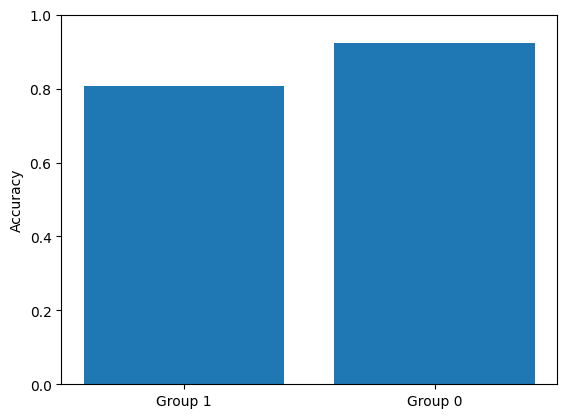

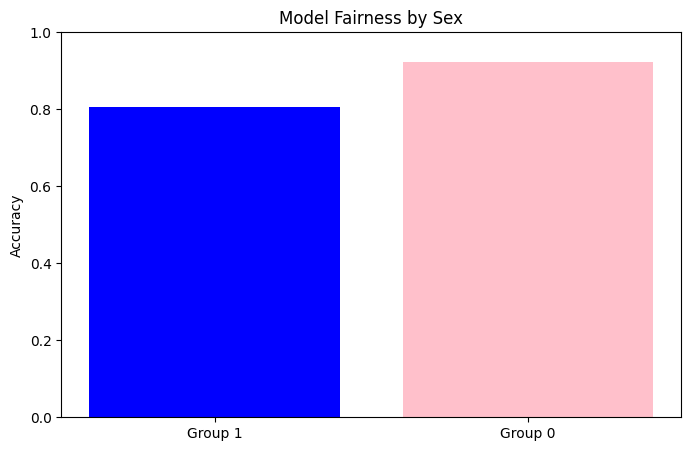


--- Responsible AI Reflection ---
The implementation of a centralized dashboard is a critical step in transitioning from opaque, "black box" algorithms to systems of accountable and transparent artificial intelligence. In a recruitment context, the dashboard acts as a fundamental auditing tool that bridges the gap between raw data outputs and human ethical oversight. By visualizing performance metrics and fairness disparities in a single interface, it transforms abstract technical evaluations into actionable insights that can prevent the automation of historical discrimination.
Transparency is primarily achieved through the detailed visualization of model metrics like the Confusion Matrix, which allows stakeholders to move beyond a single global accuracy score. When recruiters can clearly see the distribution of True Positives and False Positives, they gain a deeper understanding of the trade-offs the model is making. This visibility is essential for identifying "shortcuts," such as w

In [7]:
# ---------------------
# Part 7: Streamlit Dashboard
# ---------------------
st.title("Responsible AI Dashboard (Student Lab)")

st.subheader("Model Performance Metrics")
st.write(f"**Accuracy:** {accuracy:.4f}")
st.write(f"**Precision:** {precision:.4f}")
st.write(f"**Recall:** {recall:.4f}")


# Gráfico de equidade
st.subheader("Fairness by Group (Protected Attribute)")
fig, ax = plt.subplots()
ax.bar(fairness_results.keys(), fairness_results.values())
ax.set_ylabel("Accuracy")
ax.set_ylim(0, 1)
st.pyplot(fig)

# Reflexão sobre IA Responsável
st.subheader("Responsible AI Reflection")
st.write("""
Monitoring model metrics and fairness is fundamental for transparency and accountability.
By documenting 'Prediction vs. Reality,' we ensure the model's efficiency is measurable
and its impact is equitable across different groups. This prevents 'black box'
decision-making and allows for iterative improvements in data preparation to
mitigate algorithmic bias.
""")

# ---------------------
# Visualização no Colab
# ---------------------
print("\n--- Fairness by Group (Protected Attribute) ---")
plt.figure(figsize=(8, 5))
plt.bar(fairness_results.keys(), fairness_results.values(), color=['blue', 'pink'])
plt.ylabel("Accuracy")
plt.title("Model Fairness by Sex")
plt.ylim(0, 1)
plt.show() # Este comando renderiza o gráfico na célula do Colab.

print("\n--- Responsible AI Reflection ---")
print("""The implementation of a centralized dashboard is a critical step in transitioning from opaque, "black box" algorithms to systems of accountable and transparent artificial intelligence. In a recruitment context, the dashboard acts as a fundamental auditing tool that bridges the gap between raw data outputs and human ethical oversight. By visualizing performance metrics and fairness disparities in a single interface, it transforms abstract technical evaluations into actionable insights that can prevent the automation of historical discrimination.
Transparency is primarily achieved through the detailed visualization of model metrics like the Confusion Matrix, which allows stakeholders to move beyond a single global accuracy score. When recruiters can clearly see the distribution of True Positives and False Positives, they gain a deeper understanding of the trade-offs the model is making. This visibility is essential for identifying "shortcuts," such as when a model relies on sensitive attributes like gender rather than professional qualifications to make a prediction. Without these visual indicators, a model might appear highly efficient while actually masking significant ethical failures.
Furthermore, the dashboard enhances responsibility by embedding accountability directly into the evaluation phase of the data science workflow. The inclusion of a Fairness by Group analysis allows for the proactive detection of disparities across different demographic subsets. If the dashboard reveals that the model’s Recall is significantly lower for a protected group, it provides the empirical evidence necessary to halt deployment. This ensures that the responsibility does not end at the model's training phase but continues into a rigorous auditing process where data-driven interventions can be used to mitigate bias and refine the data preparation stage.
Ultimately, this dashboard facilitates a Human-in-the-Loop governance model, where human decision-makers are empowered to intervene based on clear evidence. By presenting precision and recall alongside fairness charts, the system ensures that AI serves as a support tool for professional merit rather than a punitive surveillance machine. This iterative cycle of monitoring and adjustment is what defines a truly responsible AI system, ensuring that transparency and dignity remain at the forefront of the technological integration in the workplace.""")


--- RESULTADOS DO TREINAMENTO (PASSO 4) ---
Accuracy (Acurácia):  0.8440
Precision (Precisão): 0.8038
Recall (Revocação):   0.5044

Matriz de Confusão:
[[6486  281]
 [1131 1151]]


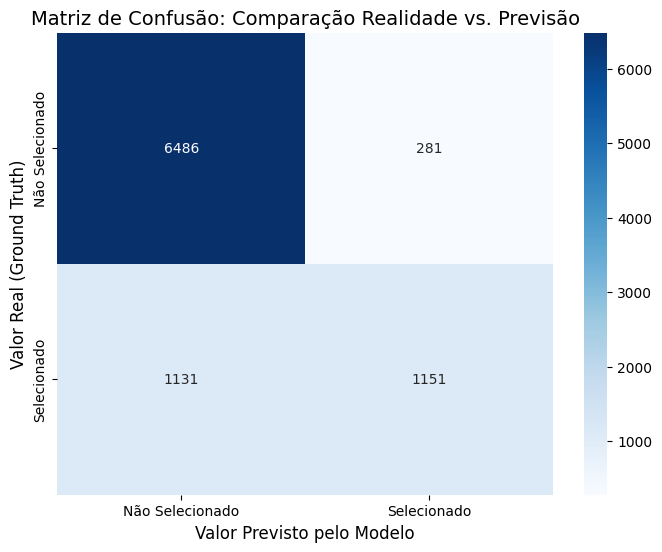

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Realizando as previsões com os dados de teste
#y_pred = model.predict(X_test)

# Calculando as métricas de eficiência
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("--- RESULTADOS DO TREINAMENTO (PASSO 4) ---")
print(f"Accuracy (Acurácia):  {acc:.4f}")
print(f"Precision (Precisão): {prec:.4f}")
print(f"Recall (Revocação):   {rec:.4f}")

# Exibindo a matriz de confusão numérica
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a matriz numérica
# Substitua 'y_test' e 'y_pred' pelas suas variáveis de teste e previsão
cm = confusion_matrix(y_test, y_pred)

# 2. Configurar o visual com Seaborn (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Selecionado', 'Selecionado'],
            yticklabels=['Não Selecionado', 'Selecionado'])

# 3. Adicionar rótulos detalhados para o Passo 4 (Avaliação)
plt.title('Matriz de Confusão: Comparação Realidade vs. Previsão', fontsize=14)
plt.ylabel('Valor Real (Ground Truth)', fontsize=12)
plt.xlabel('Valor Previsto pelo Modelo', fontsize=12)

# Exibir o gráfico no Colab ou salvar
plt.show()